In [1]:
import pandas as pd
import numpy as np
import csv
import os

In [2]:
with open("all companies.txt", "r") as f:
    all_companies = [str(line.strip()) for line in f]

all_companies

['AAA',
 'AAM',
 'AAT',
 'ABR',
 'ABS',
 'ABT',
 'ACB',
 'ACC',
 'ACG',
 'ACL',
 'ADG',
 'ADP',
 'ADS',
 'AGG',
 'AGR',
 'AMD',
 'ANV',
 'APG',
 'APH',
 'ASG',
 'ASM',
 'ASP',
 'AST',
 'BAF',
 'BBC',
 'BCE',
 'BCG',
 'BCM',
 'BFC',
 'BHN',
 'BIC',
 'BID',
 'BKG',
 'BMC',
 'BMI',
 'BMP',
 'BRC',
 'BSI',
 'BSR',
 'BTP',
 'BTT',
 'BVH',
 'BWE',
 'C32',
 'C47',
 'CCC',
 'CCI',
 'CCL',
 'CDC',
 'CHP',
 'CIG',
 'CII',
 'CKG',
 'CLC',
 'CLL',
 'CLW',
 'CMG',
 'CMV',
 'CMX',
 'CNG',
 'COM',
 'CRC',
 'CRE',
 'CSM',
 'CSV',
 'CTD',
 'CTF',
 'CTG',
 'CTI',
 'CTR',
 'CTS',
 'CVT',
 'D2D',
 'DAH',
 'DAT',
 'DBC',
 'DBD',
 'DBT',
 'DC4',
 'DCL',
 'DCM',
 'DGC',
 'DGW',
 'DHA',
 'DHC',
 'DHG',
 'DHM',
 'DIG',
 'DLG',
 'DMC',
 'DPG',
 'DPM',
 'DPR',
 'DQC',
 'DRC',
 'DRH',
 'DRL',
 'DSC',
 'DSE',
 'DSN',
 'DTA',
 'DTL',
 'DTT',
 'DVP',
 'DXG',
 'DXS',
 'DXV',
 'EIB',
 'ELC',
 'EVE',
 'EVF',
 'EVG',
 'FCM',
 'FCN',
 'FDC',
 'FIR',
 'FIT',
 'FLC',
 'FMC',
 'FPT',
 'FRT',
 'FTS',
 'GAB',
 'GAS',
 'GDT',


In [3]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df_model = pd.read_csv('data.csv')

# Chuyển cột quarter sang kiểu datetime
df_model['quarter'] = pd.to_datetime(df_model['quarter'])

# Đặt index là company_id và quarter
df_model.set_index(['company_id', 'quarter'], inplace=True)

df_model

P     EPS       D/E        P/E       SIZE  \
company_id quarter                                                            
AAT        2021-01-01     25.205072   255.0  0.512473   0.098843  27.209623   
           2021-04-01     29.262598   458.0  0.404865   0.063892  27.171920   
           2021-07-01     31.415798    71.0  0.588726   0.442476  27.300396   
           2022-01-01     30.817686   341.0  0.850883   0.090374  27.844351   
           2022-04-01     28.399588  1384.0  0.452911   0.020520  27.726307   
...                             ...     ...       ...        ...        ...   
YEG        2023-04-01   6842.381356   197.0  0.653451  34.732900  28.046513   
           2023-07-01   7707.907010   177.0  0.352569  43.547497  28.247203   
           2023-10-01   9981.021286   328.0  0.356841  30.429943  28.263978   
           2024-01-01  10697.457627   131.0  0.327452  81.659982  28.239008   
           2024-07-01   9453.650794   190.0  0.688901  49.756057  28.516059   

                         P_t_plus_1  
company_id quarter                   
AAT        2021-01-01     29.262598  
           2021-04-01     31.415798  
           2021-07-01     31.342951  
           2022-01-01     28.399588  
           2022-04-01     24.546092  
...                             ...  
YEG        2023-04-01   7707.907010  
           2023-07-01   9981.021286  
           2023-10-01  10697.457627  
           2024-01-01   9415.901639  
           2024-07-01  12406.774194  

[5302 rows x 6 columns]

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Giả sử df_model là DataFrame chứa dữ liệu của bạn
# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa toàn bộ DataFrame
df_model_scaled = df_model.copy()  # Tạo bản sao để không thay đổi dữ liệu gốc
df_model_scaled[:] = scaler.fit_transform(df_model)

# Kiểm tra lại dữ liệu đã chuẩn hóa
df_model_scaled

P      EPS       D/E       P/E      SIZE  \
company_id quarter                                                       
AAT        2021-01-01 -0.572793 -0.09261 -0.229681 -0.116384 -0.738280   
           2021-04-01 -0.572629 -0.09261 -0.261315 -0.116439 -0.762110   
           2021-07-01 -0.572543 -0.09261 -0.207265 -0.115847 -0.680909   
           2022-01-01 -0.572567 -0.09261 -0.130197 -0.116397 -0.337112   
           2022-04-01 -0.572664 -0.09261 -0.247191 -0.116507 -0.411720   
...                         ...      ...       ...       ...       ...   
YEG        2023-04-01 -0.298563 -0.09261 -0.188237 -0.062193 -0.209340   
           2023-07-01 -0.263746 -0.09261 -0.276689 -0.048401 -0.082498   
           2023-10-01 -0.172308 -0.09261 -0.275433 -0.068926 -0.071895   
           2024-01-01 -0.143488 -0.09261 -0.284073  0.011233 -0.087677   
           2024-07-01 -0.193522 -0.09261 -0.177816 -0.038687  0.087428   

                       P_t_plus_1  
company_id quarter                 
AAT        2021-01-01   -0.579814  
           2021-04-01   -0.579727  
           2021-07-01   -0.579730  
           2022-01-01   -0.579848  
           2022-04-01   -0.580003  
...                           ...  
YEG        2023-04-01   -0.271943  
           2023-07-01   -0.180804  
           2023-10-01   -0.152079  
           2024-01-01   -0.203462  
           2024-07-01   -0.083545  

[5302 rows x 6 columns]

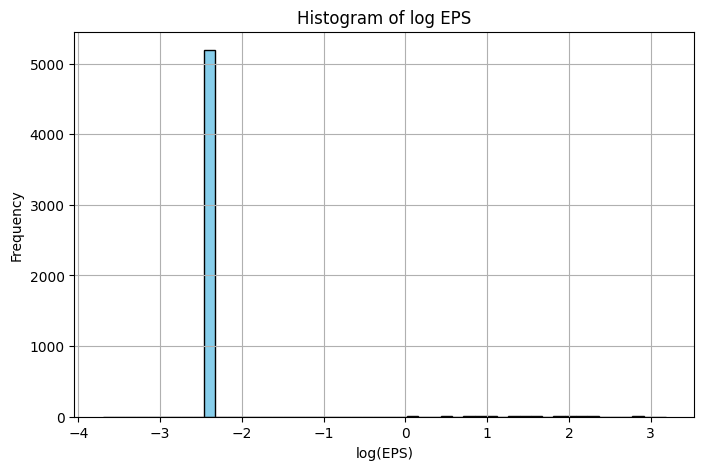

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(np.log(np.abs(df_model_scaled['EPS'])).dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of log EPS')
plt.xlabel('log(EPS)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


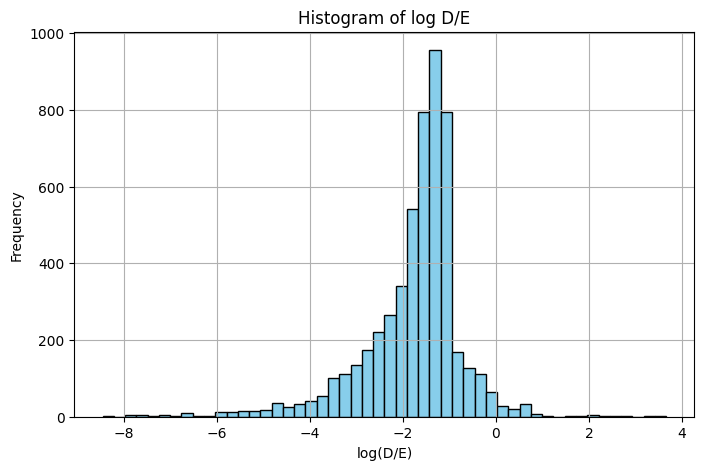

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(np.log(np.abs(df_model_scaled['D/E'])).dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of log D/E')
plt.xlabel('log(D/E)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


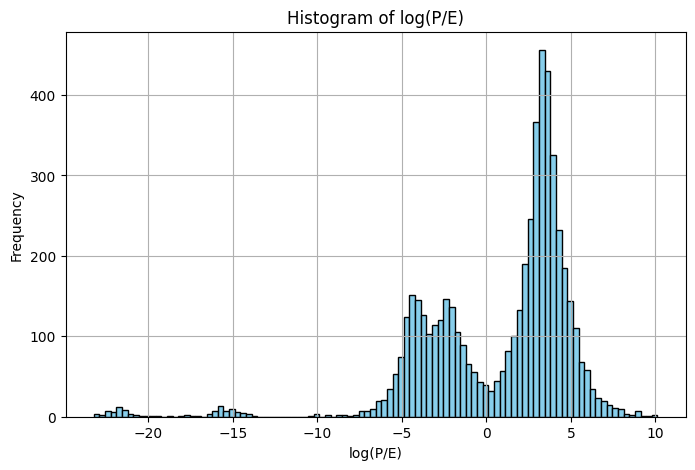

In [7]:
import numpy as np

# Loại bỏ giá trị âm hoặc 0 trước khi log
pe_values_all = df_model['P/E']

# Vẽ histogram với log(P/E)
plt.figure(figsize=(8, 5))
plt.hist(np.log(np.abs(pe_values_all)), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of log(P/E)')
plt.xlabel('log(P/E)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

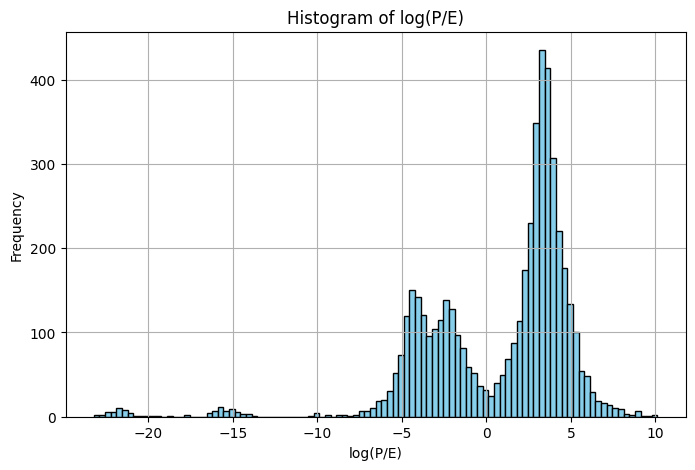

In [8]:
import numpy as np

# Loại bỏ giá trị âm hoặc 0 trước khi log
pe_values = df_model['P/E']
pe_values = pe_values[pe_values > 0]  # chỉ lấy giá trị dương

# Vẽ histogram với log(P/E)
plt.figure(figsize=(8, 5))
plt.hist(np.log(pe_values), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of log(P/E)')
plt.xlabel('log(P/E)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
from scipy.special import rel_entr
def kl_divergence(col_1, col_2):
    # Dùng cùng bin để so sánh
    bins = np.histogram_bin_edges(np.concatenate([np.log(np.abs(df_model[col_1])), np.log(np.abs(df_model[col_2]))]), bins='auto')

    # Histogram và chuẩn hóa
    p_hist, _ = np.histogram(np.log(np.abs(df_model[col_1])), bins=bins, density=True)
    q_hist, _ = np.histogram(np.log(np.abs(df_model[col_2])), bins=bins, density=True)

    # Thêm epsilon để tránh chia cho 0
    epsilon = 1e-10
    p = p_hist + epsilon
    q = q_hist + epsilon

    # Chuẩn hóa lại để đảm bảo tổng = 1 (phân phối xác suất)
    p /= p.sum()
    q /= q.sum()

    kl_divergence = np.sum(rel_entr(p, q))
    print(f'KL divergence: {col_1}, {col_2}', kl_divergence)

kl_divergence('P', 'EPS')

kl_divergence('P', 'D/E')

kl_divergence('P', 'P/E')

kl_divergence('P', 'SIZE')

kl_divergence('EPS', 'D/E')

kl_divergence('EPS', 'P/E')

kl_divergence('EPS', 'SIZE')

kl_divergence('D/E', 'P/E')

kl_divergence('D/E', 'SIZE')

kl_divergence('P/E', 'SIZE')

KL divergence: P, EPS 4.088134732416421
KL divergence: P, D/E 14.802323298186497
KL divergence: P, P/E 4.21664241742531
KL divergence: P, SIZE 18.23572812745514
KL divergence: EPS, D/E 17.114248461883182
KL divergence: EPS, P/E 2.453777092482631
KL divergence: EPS, SIZE 20.608579190484473
KL divergence: D/E, P/E 2.055036298470501
KL divergence: D/E, SIZE 21.569707598571036
KL divergence: P/E, SIZE 18.42764863415418


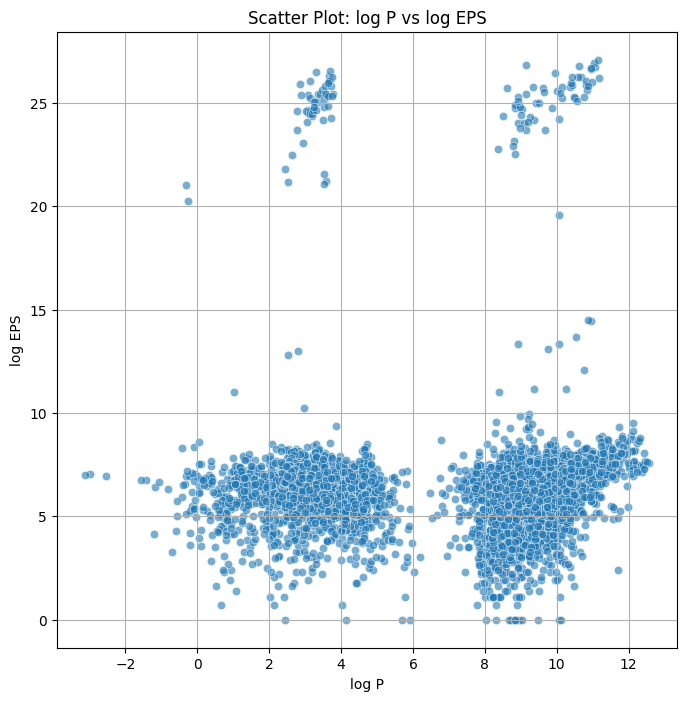

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['P'])), y=np.log(np.abs(df_model['EPS'])), alpha=0.6)

plt.xlabel('log P')
plt.ylabel('log EPS')
plt.title('Scatter Plot: log P vs log EPS')
plt.grid(True)
plt.show()


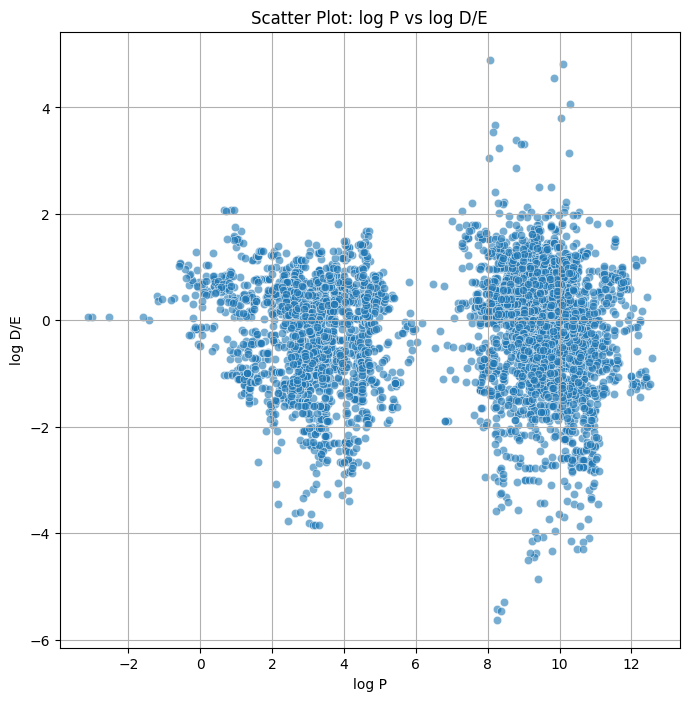

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['P'])), y=np.log(np.abs(df_model['D/E'])), alpha=0.6)

plt.xlabel('log P')
plt.ylabel('log D/E')
plt.title('Scatter Plot: log P vs log D/E')
plt.grid(True)
plt.show()


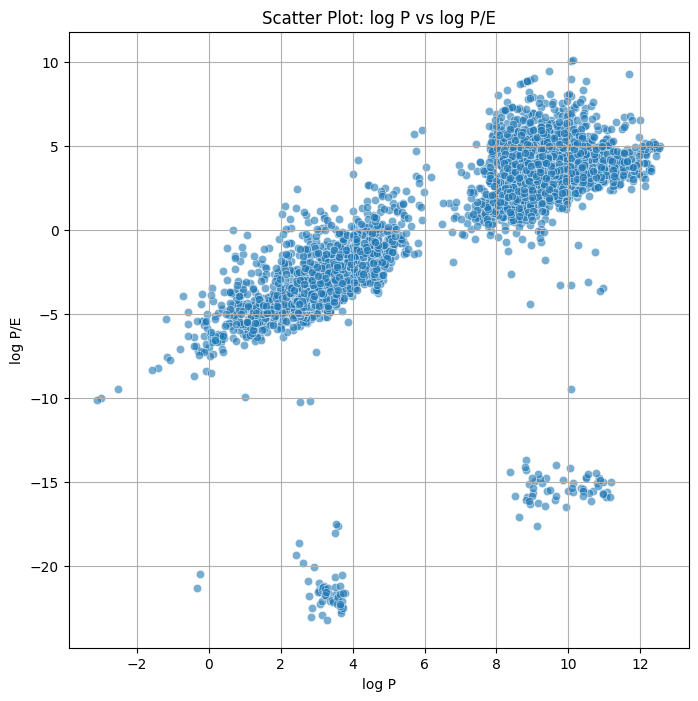

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['P'])), y=np.log(np.abs(df_model['P/E'])), alpha=0.6)

plt.xlabel('log P')
plt.ylabel('log P/E')
plt.title('Scatter Plot: log P vs log P/E')
plt.grid(True)
plt.show()


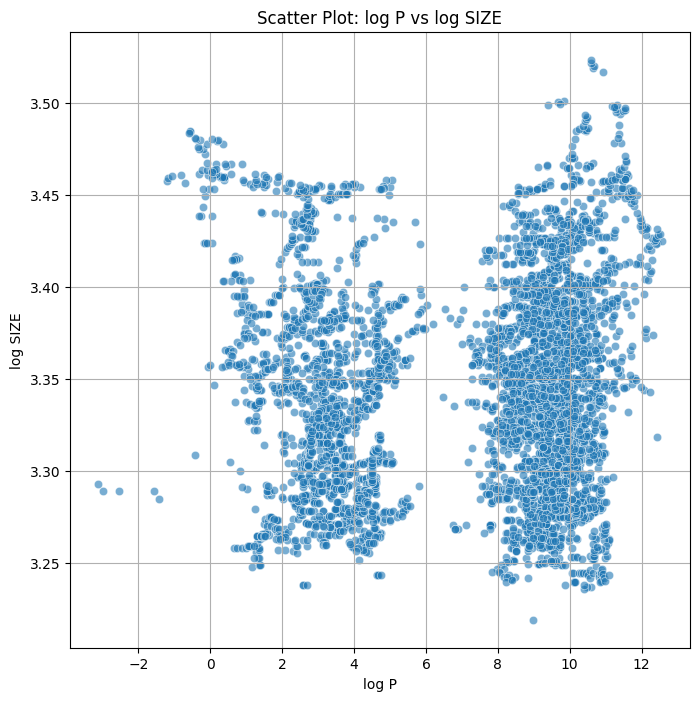

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['P'])), y=np.log(np.abs(df_model['SIZE'])), alpha=0.6)

plt.xlabel('log P')
plt.ylabel('log SIZE')
plt.title('Scatter Plot: log P vs log SIZE')
plt.grid(True)
plt.show()


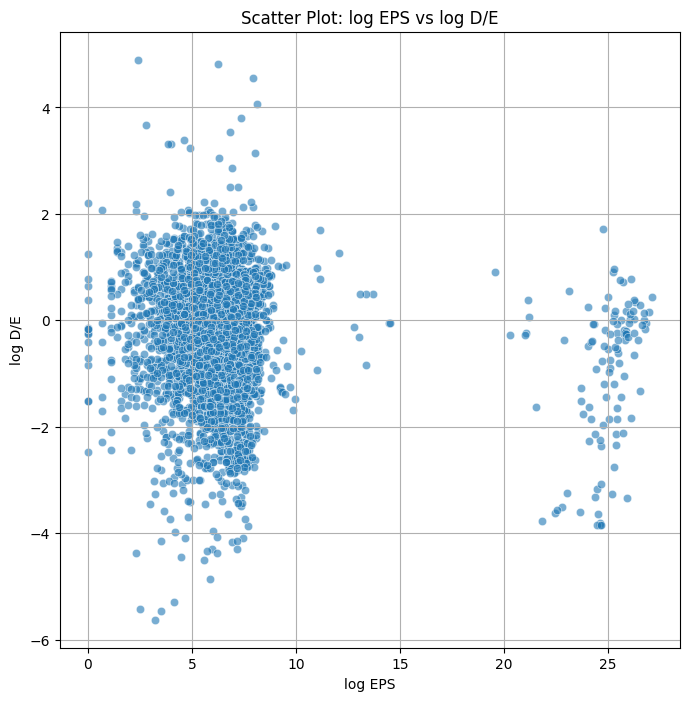

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['EPS'])), y=np.log(np.abs(df_model['D/E'])), alpha=0.6)

plt.xlabel('log EPS')
plt.ylabel('log D/E')
plt.title('Scatter Plot: log EPS vs log D/E')
plt.grid(True)
plt.show()


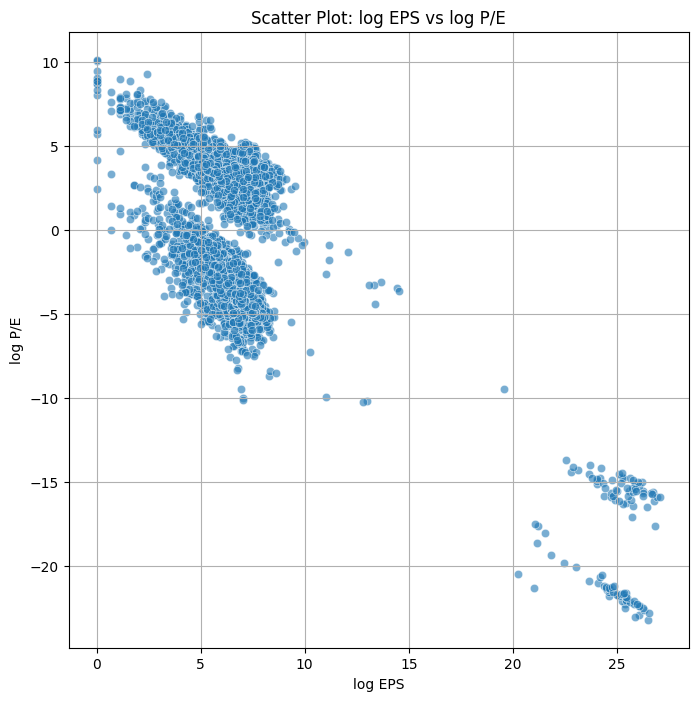

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['EPS'])), y=np.log(np.abs(df_model['P/E'])), alpha=0.6)

plt.xlabel('log EPS')
plt.ylabel('log P/E')
plt.title('Scatter Plot: log EPS vs log P/E')
plt.grid(True)
plt.show()


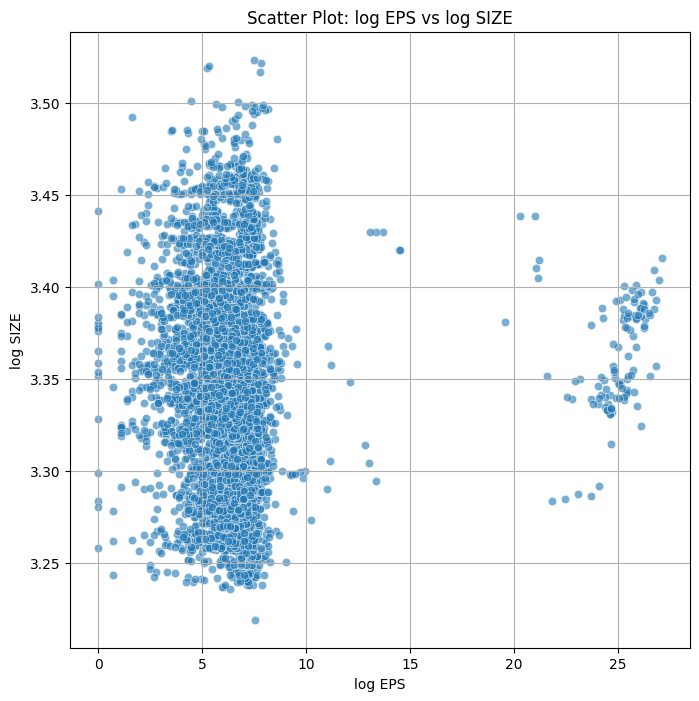

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['EPS'])), y=np.log(np.abs(df_model['SIZE'])), alpha=0.6)

plt.xlabel('log EPS')
plt.ylabel('log SIZE')
plt.title('Scatter Plot: log EPS vs log SIZE')
plt.grid(True)
plt.show()


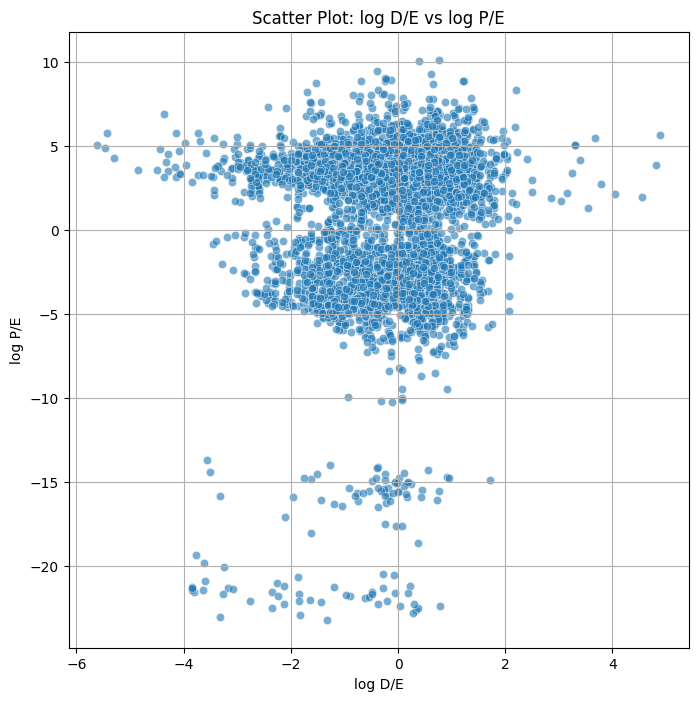

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['D/E'])), y=np.log(np.abs(df_model['P/E'])), alpha=0.6)

plt.xlabel('log D/E')
plt.ylabel('log P/E')
plt.title('Scatter Plot: log D/E vs log P/E')
plt.grid(True)
plt.show()


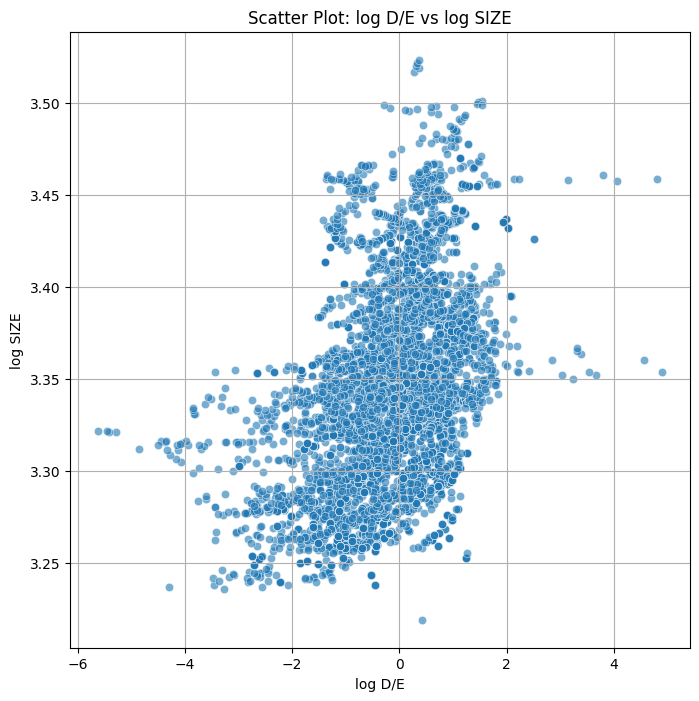

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['D/E'])), y=np.log(np.abs(df_model['SIZE'])), alpha=0.6)

plt.xlabel('log D/E')
plt.ylabel('log SIZE')
plt.title('Scatter Plot: log D/E vs log SIZE')
plt.grid(True)
plt.show()


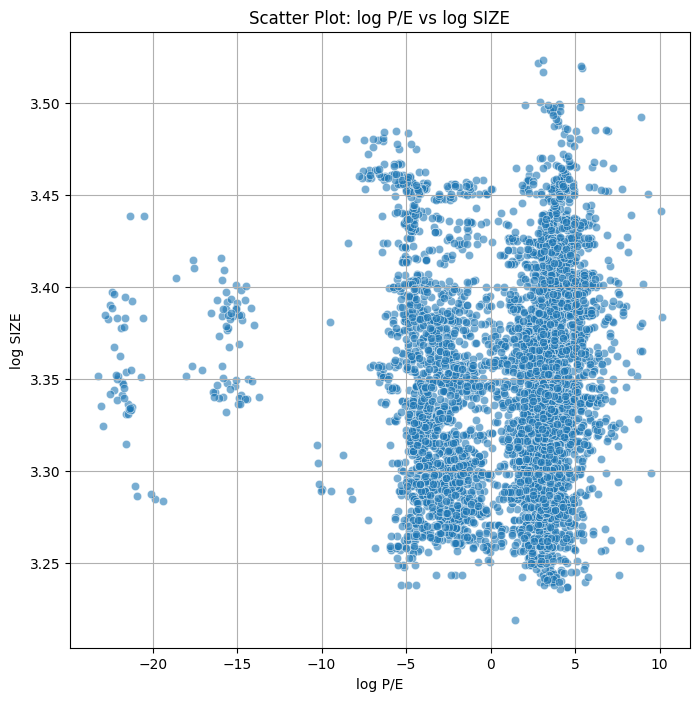

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Vẽ scatter plot
sns.scatterplot(x=np.log(np.abs(df_model['P/E'])), y=np.log(np.abs(df_model['SIZE'])), alpha=0.6)

plt.xlabel('log P/E')
plt.ylabel('log SIZE')
plt.title('Scatter Plot: log P/E vs log SIZE')
plt.grid(True)
plt.show()
